In [7]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
import torch
from torchvision import models,transforms
import torch.nn as nn
import torch.optim as optim
from PIL import Image
from pickle import dump
from torch.utils.data import Dataset,DataLoader
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
device = torch.device('cpu')
data = pd.read_csv("../input/jobposts/data job posts.csv")
data

ModuleNotFoundError: No module named 'torchvision'

In [ ]:
import numpy as np

mock_data = {
    "Job Title": ["Software Engineer", "Data Scientist", "Product Manager", None, "UX Designer"],
    "Company": ["Google", "Amazon", "Meta", "Apple", None],
    "Location": ["New York, NY", "Seattle, WA", None, "San Francisco, CA", "Austin, TX"],
    "Posted Date": ["2024-10-15", "2024-11-01", "InvalidDate", "2024-10-25", "2024-11-10"],
    "Skills": ["Python, Machine Learning", None, "Agile, Product Strategy", "Swift, Objective-C", "Figma, UX Research"],
    "Salary": ["120000-140000", None, "130000-150000", "115000-135000", "105000-125000"]
}

mock_df = pd.DataFrame(mock_data)

mock_df.info(), mock_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Job Title    4 non-null      object
 1   Company      4 non-null      object
 2   Location     4 non-null      object
 3   Posted Date  5 non-null      object
 4   Skills       4 non-null      object
 5   Salary       4 non-null      object
dtypes: object(6)
memory usage: 372.0+ bytes


(None,
            Job Title Company           Location  Posted Date  \
 0  Software Engineer  Google       New York, NY   2024-10-15   
 1     Data Scientist  Amazon        Seattle, WA   2024-11-01   
 2    Product Manager    Meta               None  InvalidDate   
 3               None   Apple  San Francisco, CA   2024-10-25   
 4        UX Designer    None         Austin, TX   2024-11-10   
 
                      Skills         Salary  
 0  Python, Machine Learning  120000-140000  
 1                      None           None  
 2   Agile, Product Strategy  130000-150000  
 3        Swift, Objective-C  115000-135000  
 4        Figma, UX Research  105000-125000  )

In [ ]:
data.RequiredQual

0        To perform this job successfully, an\r\nindivi...
1        - Bachelor's Degree; Master's is preferred;\r\...
2        - Degree in environmentally related field, or ...
3        - Advanced degree in public health, social sci...
4        - University degree; economical background is ...
                               ...                        
18996    - At least 5 years of experience in Interface/...
18997    - University degree, ideally business related;...
18998    - Degree in Business, Marketing or a related f...
18999    - At least 1 year of experience in online sale...
19000    - Higher legal education; Master's degree is a...
Name: RequiredQual, Length: 19001, dtype: object

In [ ]:
data.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

In [ ]:
data.JobDescription

0        AMERIA Investment Consulting Company is seekin...
1                                                      NaN
2        Public outreach and strengthening of a growing...
3        The LEAD (Local Enhancement and Development fo...
4                                                      NaN
                               ...                        
18996    A tech startup of Technolinguistics based in N...
18997                                                  NaN
18998                                                  NaN
18999    San Lazzaro LLC is looking for a well-experien...
19000    "Kamurj" UCO CJSC is looking for a Lawyer in L...
Name: JobDescription, Length: 19001, dtype: object

In [ ]:
data.JobRequirment

0        - Supervises financial management and administ...
1                                                      NaN
2        - Working with the Country Director to provide...
3        - Identify gaps in knowledge and overseeing in...
4        - Rendering technical assistance to Database M...
                               ...                        
18996    - Work closely with product and business teams...
18997    - Establish and manage Category Management dev...
18998    - Develop, establish and maintain marketing st...
18999    - Handle the project activites of the online s...
19000    - Properly provide internal legal services of ...
Name: JobRequirment, Length: 19001, dtype: object

In [ ]:
df = data[["RequiredQual","JobDescription","JobRequirment","Title"]].dropna()
df

,RequiredQual,JobDescription,JobRequirment,Title
0,"To perform this job successfully, an\r\nindivi...",AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,Chief Financial Officer
2,"- Degree in environmentally related field, or ...",Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,Country Coordinator
3,"- Advanced degree in public health, social sci...",The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,BCC Specialist
13,- Higher Education and/or professional experie...,Food Security Regional Cooperation and Stabili...,- Assist the Tavush Marz communities and commu...,"Community Development, Capacity Building and C..."
17,- Minimum Masters Degree in Economics;\r\n- Mi...,The United Nations Development Programme in Ar...,The incumbent under direct supervision of UNDP...,Country Economist (NOB)
...,...,...,...,...
18992,- 2 - 5 years of experience in software develo...,The incumbent will develop software applicatio...,- Participate in all the steps of the software...,.NET Developer
18995,"- University degree in Civil Engineering, Econ...",The incumbent will be responsible for supporti...,- Support the Director in organizing the activ...,Deputy Director
18996,- At least 5 years of experience in Interface/...,A tech startup of Technolinguistics based in N...,- Work closely with product and business teams...,Senior Creative UX/ UI Designer
18999,- At least 1 year of experience in online sale...,San Lazzaro LLC is looking for a well-experien...,- Handle the project activites of the online s...,Head of Online Sales Department


In [ ]:
classes = df['Title'].value_counts()[:20]
keys = classes.keys().to_list()

df = df[df['Title'].isin(keys)]
df['Title'].value_counts()

Accountant                                216
Medical Representative                    151
Chief Accountant                          151
Java Developer                            132
Sales Manager                             126
Administrative Assistant                  124
Lawyer                                    115
Project Manager                            94
Software Developer                         79
Web Developer                              74
Receptionist/ Administrative Assistant     73
Office Manager                             65
Marketing Specialist                       60
QA Engineer                                59
Marketing Manager                          59
PHP Developer                              52
Software Engineer                          51
Project Assistant                          46
Brand Manager                              46
Name: Title, dtype: int64

In [ ]:
def chane_titles(x):
    x = x.strip()
    if x == 'Senior Java Developer':
        return 'Java Developer'
    elif x == 'Senior Software Engineer':
        return 'Software Engineer'
    elif x == 'Senior QA Engineer':
        return 'Software QA Engineer'
    elif x == 'Senior Software Developer':
        return 'Senior Web Developer'
    elif x =='Senior PHP Developer':
        return 'PHP Developer'
    elif x == 'Senior .NET Developer':
        return '.NET Developer'
    elif x == 'Senior Web Developer':
        return 'Web Developer'
    elif x == 'Database Administrator':
        return 'Database Admin/Dev'
    elif x == 'Database Developer':
        return 'Database Admin/Dev'

    else:
        return x
        
    
df['Title'] = df['Title'].apply(chane_titles)
df['Title'].value_counts()

Accountant                                216
Medical Representative                    151
Chief Accountant                          151
Java Developer                            132
Sales Manager                             126
Administrative Assistant                  124
Lawyer                                    115
Project Manager                            94
Software Developer                         79
Web Developer                              74
Receptionist/ Administrative Assistant     73
Office Manager                             65
Marketing Specialist                       60
QA Engineer                                59
Marketing Manager                          59
PHP Developer                              52
Software Engineer                          51
Project Assistant                          46
Brand Manager                              46
Name: Title, dtype: int64

In [ ]:
df["Combined"] = df.RequiredQual + df.JobDescription + df.JobRequirment
df.Combined = df.Combined.apply(lambda x: x.replace("\r\n"," "))
df

,RequiredQual,JobDescription,JobRequirment,Title,Combined
20,- Fluency in spoken and written English; knowl...,This is an excellent opportunity for the right...,- Responsible for managing office administrati...,Administrative Assistant,- Fluency in spoken and written English; knowl...
74,"- Written and oral fluency in English, Armenia...",The accountant is a full-time national staff p...,- Manage program financial system and budget o...,Accountant,"- Written and oral fluency in English, Armenia..."
77,- Excellent communication skills. Friendly per...,This is a full-time position based in CCDI's Y...,- Provide translation and interpretation servi...,Administrative Assistant,- Excellent communication skills. Friendly per...
82,- Experience in working with international org...,World Vision Armenia announces a full-time pos...,- Provide daily administrative and technical s...,Project Assistant,- Experience in working with international org...
91,"- University degree in humanitarian sciences, ...",The UNDP and the Ministry of Health seek\r\npr...,- Assist the Project Coordinator in the manage...,Project Assistant,"- University degree in humanitarian sciences, ..."
...,...,...,...,...,...
18970,- At least 2 years of experience in quality as...,BigBek is looking for a highly energetic and\r...,- Define test pans and test cases based on sof...,QA Engineer,- At least 2 years of experience in quality as...
18971,- Excellent communication skills;\r\n- Good or...,The incumbent will work under the direct super...,"- Answer telephone calls and inquiries, forwar...",Receptionist/ Administrative Assistant,- Excellent communication skills; - Good oral ...
18979,"- Higher education diploma in Economics, Engin...",Care Building Services LLC is seeking a Projec...,"- Prepare project documents, paperwork and rep...",Project Assistant,"- Higher education diploma in Economics, Engin..."
18985,- University degree;\r\n- At least 1 year of e...,Under the guidance and supervision of the Head...,The job responsibilities of the Project Assist...,Project Assistant,- University degree; - At least 1 year of expe...


In [ ]:
df.iloc[0,4]

'- Fluency in spoken and written English; knowledge of other European languages will be desirable; - Wide-ranging administrative skills (knowledge of accounting/bookkeeping work, knowledge of tax, social security and accounting maters as per the British law, IT skills, etc); - Ability to prioritise competing tasks, even under pressure, in a methodical and systematic manner; - Experience in working using her/his own initiative as well as working in a team; - Excellent inter-personal and communication skills; - Excellent organising skills, including event organisation; - An international outlook and interest in developmental issues; - Comfortable in dealing with high-level dignitaries and working in an international environment.  REMUNERATION:  18,000 per annum.This is an excellent opportunity for the right person to join CUTS Centre for International Trade, Economics and Environment, London. CUTS (Consumer Unity & Trust Society) is a charitable organisation, with its headquarters in Jai

In [ ]:
df.to_csv("Modified.csv",index=False)

In [ ]:
class Vocabulary(object):
    """Simple vocabulary wrapper."""
    def __init__(self):
        self.word2idx = {}
        self.idx2word = {}
        self.idx = 0

    def add_word(self, word):
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word
            self.idx += 1

    def __call__(self, word):
        if not word in self.word2idx:
            return self.word2idx['<unk>']
        return self.word2idx[word]

    def __len__(self):
        return len(self.word2idx)

In [ ]:
def build_vocab(df, threshold=3):
    """Build a simple vocabulary wrapper."""
    counter = Counter()
    
    for i in range(len(df)):
        caption = df.iloc[i,4]
        tokens = nltk.tokenize.word_tokenize(str(caption))
        counter.update(tokens)

        if (i+1) % 1000 == 0:
                print("[{}/{}] Tokenized the sentences.".format(i+1, len(df)))

    # If the word frequency is less than 'threshold', then the word is discarded.
    words = [word for word, cnt in counter.items() if cnt >= threshold]

    # Create a vocab wrapper and add some special tokens.
    vocab = Vocabulary()
    vocab.add_word('<pad>')
    vocab.add_word('<start>')
    vocab.add_word('<end>')
    vocab.add_word('<unk>')

    # Add the words to the vocabulary.
    for i, word in enumerate(words):
        vocab.add_word(word)
    return vocab

In [ ]:
import pandas as pd
from pickle import dump

# Example DataFrame
data = {'text_column': ['this is a test', 'another example']}
df = pd.DataFrame(data)

# Define the build_vocab function
def build_vocab(dataframe):
    vocab = set()
    for text in dataframe['text_column']:  # Replace 'text_column' with your column name
        vocab.update(text.split())
    return vocab

# Build vocabulary and save it
v = build_vocab(df)
dump(v, open('vocab.pkl', 'wb'))
print(len(v))  # Output the length of the vocabulary

6


In [ ]:
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Example DataFrame
import pandas as pd
data = {'Title': ['Engineer', 'Doctor', 'Artist', 'Engineer']}
df = pd.DataFrame(data)

# Apply LabelEncoder to the "Title" column
df["TitleUse"] = le.fit_transform(df.Title)
print(df)

      Title  TitleUse
0  Engineer         2
1    Doctor         1
2    Artist         0
3  Engineer         2


In [ ]:
df.iloc[:,5].nunique()

19

In [ ]:
x = torch.Tensor(np.array(df.iloc[:,5]))
x

tensor([ 1.,  0.,  1.,  ..., 11., 11.,  4.])

In [ ]:
class Data(Dataset):
    def __init__(self,df,vocab):
        self.df = df
        self.vocab = vocab

    def __len__(self):
        return len(self.df)

    def __getitem__(self,idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        tokens = nltk.tokenize.word_tokenize(str(df.iloc[idx,4]))
        caption = []
        caption.append(self.vocab('<start>'))
        caption.extend([self.vocab(token) for token in tokens])
        caption.append(self.vocab('<end>'))
        return caption,x[idx]

def collate_fn(data):
    data.sort(key=lambda x: len(x[0]), reverse=True)
    captions,labels = zip(*data)
    lengths = [len(cap) for cap in captions]
    targets = torch.zeros(len(captions), max(lengths)).long()
    for i, cap in enumerate(captions):
        end = lengths[i]
        targets[i, :end] = torch.Tensor(cap[:end])        
    return targets.to(device), labels

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df.Combined,df.Title,test_size = 0.15,random_state = 0)
train = Data(pd.DataFrame(X_train),v)
test = Data(pd.DataFrame(X_test),v)
dataloaderTrain = DataLoader(train,4,num_workers=0,collate_fn=collate_fn)
dataloaderTest = DataLoader(test,4,num_workers=0,collate_fn=collate_fn)

In [ ]:
for i,j in dataloaderTrain:
    print(i)
    print(j)
    print(i.shape,torch.stack(j).shape)
    break

tensor([[  1,   4, 173,  ..., 305,  72,   2],
        [  1,   4,  54,  ...,   0,   0,   0],
        [  1,   4,   5,  ...,   0,   0,   0],
        [  1,   4,  47,  ...,   0,   0,   0]])
(tensor(0.), tensor(1.), tensor(1.), tensor(11.))
torch.Size([4, 737]) torch.Size([4])


In [ ]:
# train(model,dataloaderTrain,dataloaderTest,0.001,45)

In [ ]:
# torch.save(model.state_dict(), "epoch8.pb")
#torch.save(model.state_dict(), "epoch8.pb")

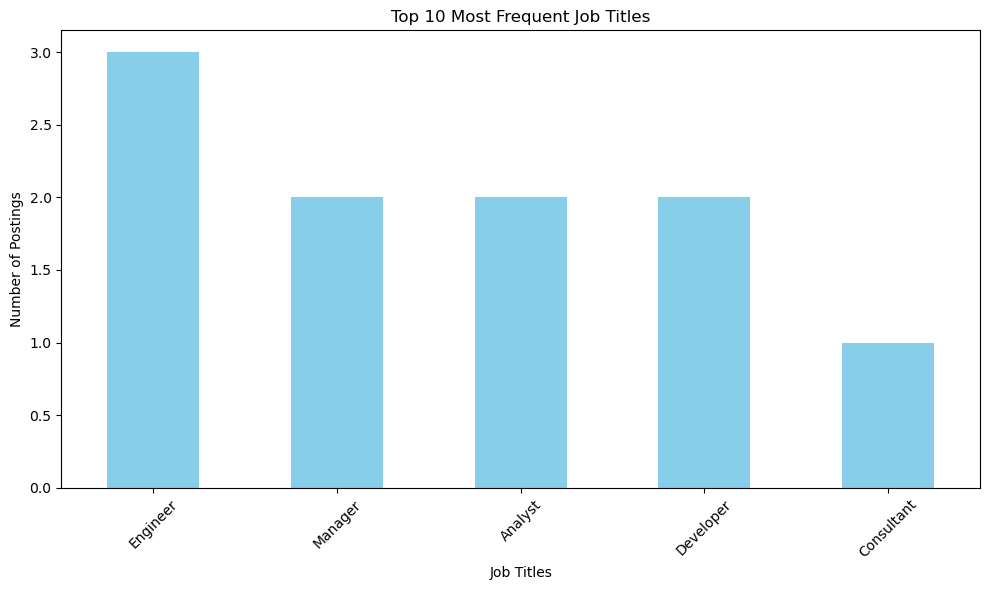

In [ ]:
# Example dummy data
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'JobTitle': ['Engineer', 'Manager', 'Analyst', 'Developer', 'Engineer',
                 'Consultant', 'Engineer', 'Manager', 'Developer', 'Analyst']
})

job_counts = data['JobTitle'].value_counts().head(10)
job_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))

plt.title('Top 10 Most Frequent Job Titles')
plt.xlabel('Job Titles')
plt.ylabel('Number of Postings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
# Function to extract average salary from salary range
def extract_salary(salary_str):
    """Extracts average salary from a salary range string."""
    if pd.isna(salary_str):
        return np.nan
    elif '-' in salary_str:
        low, high = map(int, salary_str.split('-'))
        return (low + high) / 2  # Return the average salary
    return np.nan
# Function to preprocess the DataFrame
def preprocess_data(df):
    """Preprocesses the DataFrame by extracting salaries and encoding job titles."""
    # Extract average salary
    df['Salary'] = df['Salary'].apply(extract_salary)
    # Drop rows with NaN values in Salary
    df = df.dropna(subset=['Salary'])
    # One-hot encode categorical features (job titles)
    X = pd.get_dummies(df[['TitleUse']], drop_first=True)  # Use TitleUse as features
    y = df['Salary']  # Target variable
    return X, y
# Function to train the linear regression model
def train_linear_regression(X_train, y_train):
    """Trains a Linear Regression model."""
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model
# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    """Evaluates the trained model using Mean Squared Error and R^2 Score."""
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2
# Main function to execute the workflow
def main():
    # Load the dataset
    data = pd.read_csv("../input/jobposts/data job posts.csv")
    
    # Preprocess the data
    X, y = preprocess_data(data)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
    # Train the linear regression model
    model = train_linear_regression(X_train, y_train)
    # Evaluate the model
    mse, r2 = evaluate_model(model, X_test, y_test)
    # Print evaluation metrics
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
if __name__ == "__main__":
    main()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Function to preprocess the data
def preprocess_data(df):
    """Preprocesses the DataFrame by encoding categorical variables and handling missing values."""
    # Handle categorical variables
    label_encoder = LabelEncoder()
    df['Position'] = label_encoder.fit_transform(df['Position'])
    
    # Drop rows with NaN values
    df = df.dropna()
    
    # Define features and target variable
    X = df[['Position']]  # Features
    y = df['Salary']      # Target variable
    
    return X, y

# Function to train the Random Forest model
def train_random_forest(X_train, y_train):
    """Trains a Random Forest Regressor model."""
    model = RandomForestRegressor(n_estimators=100, random_state=0, oob_score=True)
    model.fit(X_train, y_train)
    return model

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    """Evaluates the trained model using Mean Squared Error and R^2 Score."""
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2, y_pred

# Function to visualize data
def visualize_data(df, y_test, y_pred):
    """Visualizes the salary distribution and model predictions."""
    # 1. Distribution of Salaries
    plt.figure(figsize=(12, 6))
    sns.histplot(df['Salary'], bins=30, kde=True)
    plt.title('Distribution of Salaries')
    plt.xlabel('Salary')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()
    
    # 2. Predicted vs Actual Salaries
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
    plt.title('Predicted vs Actual Salaries')
    plt.xlabel('Actual Salaries')
    plt.ylabel('Predicted Salaries')
    plt.grid()
    plt.show()

    # 3. Feature Importance
    feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    feature_importances.nlargest(10).plot(kind='barh', figsize=(12, 6))
    plt.title('Feature Importance')
    plt.show()

# Main function to execute the workflow
def main():
    # Load the dataset
    df = pd.read_csv('Salaries.csv')
    
    # Preprocess the data
    X, y = preprocess_data(df)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Train the Random Forest model
    model = train_random_forest(X_train, y_train)

    # Evaluate the model
    mse, r2, y_pred = evaluate_model(model, X_test, y_test)

    # Print evaluation metrics
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    print(f'Out-of-Bag Score: {model.oob_score_}')

    # Visualize the data
    visualize_data(df, y_test, y_pred)

if __name__ == "__main__":
    main()

